# Machine Problem  1 - Path Planning
 **Cruz, Rianna**   
 **Leal, Lois Anne**

## Problem Description: 
Consider the problem of finding the shortest path between two points on a plane that has polygonal obstacles. This is an idealization of the problem a robot has to solve to navigate it way around a crowded environment.

## Solution Proper:

We provide the solution such that we first discuss how we set up the state space--from our input files to the graph dictionary that we will be using in our search algorithms. We then discuss each algorithms using our first test cases. We compress our code for each major steps into functions to provide readability, since we will be using them in other test cases. So at the end of the discussion of each algorithm, we run the five test cases--the first one included--so as to show and provided understanding to each test case.

At the end, after we have discussed all the algorithms and run each five test cases for each algorithm, we analyze and compare each algorithm. The five test cases are actually created with the mind to benefit the analysis and comparison of the algorithms--showing their strengths and weaknesses in the selected criteria.

### 1. Setting Up the State Space 

  #### A. As Grid

In setting up the state space, our main function is the createStateSpaceGrid which outputs the startNode, goalNode and the grid we will be using in our next step. The format of the call function is as shown below:

      startNode, goalNode, grid, shapes = createStateSpaceGrid(fileName,imgName)

The idea of createStateSpace is further divided into three major group of steps. The first one is to read the .txt file using the *read_input* function. To express the obstacles into an accessible 100 x 200 grid, we defined two functions such as *plot_polygon* and *plot_point* so as to first plot them and save the result as a .png image. We want the image to be in grayscale so as to refer to 0s as points not in the polygon obstacle(s) and to refer to 1s as points in the polygon obstacle(s). Lastly, out of the image, we create the accessible grid. 

*Note:* Together with the functions stated above, we also used some python libraries such as matplotlib, numpy and cv2.

In [1]:
import re

def read_input(filename):
    file = open (filename, 'r+', encoding='utf-8')
    point = r'([\d]+,[\d]+)'

    start = tuple(map(int, re.search(point, file.readline())[0].split(',')))
    goal  = tuple(map(int, re.search(point, file.readline())[0].split(',')))

    shapes = []
    for line in file:
        shape = []
        for point_i in re.findall(point, line):
            point_int = map(int, point_i.split(','))
            shape.append(list(point_int))
        shapes.append(shape)

    file.close()
    return start, goal, shapes

In [2]:
import matplotlib.pyplot as plt

def plot_polygon(coord):
    coord.append(coord[0]) # repeat the first point to create a 'closed loop'
    xs, ys = zip(*coord)   # create lists of x and y values
    plt.plot(ys,xs, linewidth=5) 

def plot_point(pt):
    plt.scatter(pt[1], pt[0], 20)

In [30]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

def createStateSpaceGrid(fileName, imgName):
    # read .txt file
    startNode, goalNode, shapes = read_input(fileName) 

    # plot the figure
    plt.figure() 
    plt.xlim(0, 200)
    plt.ylim(0, 100)
    plt.gca().invert_yaxis()

    for shape in shapes:
        plot_polygon(shape) 

    # plot starting and goal points
    #plot_point(startNode) 
    #plot_point(goalNode)

    # save the figure as .png image file
    plt.axis('off')
    plt.tick_params(axis='both', left=False, top=False, right=False, bottom=False, labelleft=False, labeltop=False,
                        labelright=False, labelbottom=False)
    # plt.savefig('maze.png', bbox_inches='tight', transparent=True, pad_inches=0)
    plt.savefig(imgName, bbox_inches='tight', transparent=True, pad_inches=0)
    plt.clf() 
    
    # read the image file and resize to original scale
    img = cv2.imread(imgName, cv2.IMREAD_GRAYSCALE)
    light = cv2.resize(img, (200, 100))
    
    # ensure borderless processing
    plt.axis('off')
    plt.tick_params(axis='both', left=False, top=False, right=False, bottom=False, labelleft=False, labeltop=False,
                            labelright=False, labelbottom=False)
    plt.tight_layout(pad=0)
    
    # convert to grayscale for later for
    # 0s to mean not a point in the polygon obstacle
    # 1s to mean a point in the polygon obstacle
    imgplot = plt.imshow(img, cmap='Greys_r')

    plt.show()

    # initialize the grid
    grid = np.zeros((100, 200))

    # express the sides of the polygon obstacle(s) as 1s 
    # in the grid
    for row, row_points in enumerate(light):
        for col, col_val in enumerate(row_points):
            if col_val < 255:
                grid[row][col] = 1

    grid = grid.tolist()
    
    return startNode, goalNode, grid, shapes

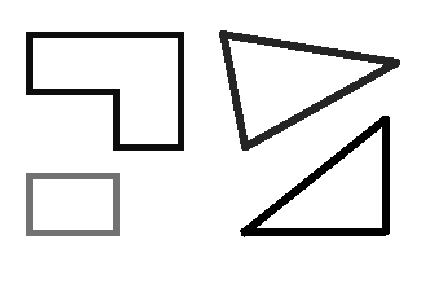

In [4]:
startNode, goalNode, grid, shapes = createStateSpaceGrid('in2.txt','maze2.png')

  #### B. Converting the Grid Representation to a Graph Dictionary

After getting the accessible grid, we convert it further to a graph dictionary. The rationale behind choosing graph dictionary is that, we can manipulate them easier and they also simulate the behavior of trees per se. 

Our main function here is:

                               graph = createGraph(grid) 

The graph dictionary has the following structure:

                  (parent tuple): [(child1 tuple), (child2 tuple), ...]
                         
Intuitively, explaining the structure, we use tuples to represent the nodes of our graph such that for each cell in the grid, we see them as nodes in the graph. Furthermore, the format above explains that for each node in the grid and *not in a polygon obstacle*, we consider as a parent node and its children, *also not in a polygon obstacle*, as the possible moves which are left, right, top and bottom. 

In [5]:
from collections import defaultdict 

def addEdge(graph,u,v): 
    graph[u].append(v)


def createGraph(grid):
    #get the size of the grid
    rows = len(grid) 
    cols = len(grid[0])

    graph = defaultdict(list) 
    
    for row in range(rows):
        for col in range(cols):
            # move only when there's a space to move in the direction
            # and the considered point is not a point in the obstacle
        
            if col != 0 and grid[row][col]!=1 and grid[row][col-1]!=1:
                addEdge(graph,(row,col),(row,col-1)) #left
                
            if col < cols-1 and grid[row][col]!=1 and grid[row][col+1]!=1:
                addEdge(graph,(row,col),(row,col+1)) #right
                
            if row != 0 and grid[row][col]!=1 and grid[row-1][col]!=1:
                addEdge(graph,(row,col),(row-1,col)) #top
                
            if row < rows-1 and grid[row][col]!=1 and grid[row+1][col]!=1:
                addEdge(graph,(row,col),(row+1,col)) #bottom
    
    return graph

In [6]:
graph = createGraph(grid) 

In [7]:
# uncomment to print the graph dictionary 
# for k,v in graph.items():
#    print(k,':',v)

### 2. Search Algorithms

Now that our state space is set, we proceed to our Search Algorithms which will be explained in the following order: Breadth-First Search(BFS), Depth-First Search(DFS) and A* Search. 

For each search algorithm, we give the state again the problem definition. We then show the data structures that will be used and tell its process. Also, in some of the algorithms we included remarks such as word of cautions and some notes. 

Each algorithm is implemented as a function such that each has a calling function of the format:

                  <name>SolPath = <name>Algo(graph, startNode, goalNode)
                           
where *name* can be 'bfs','dfs', or 'Astar'. This function prints the starting point, goal point, solution path, cost of solution, number of expanded nodes, and actual running time of the program. Note, however, that in BFS and DFS, each step is 1. Thus, the cost of the solution path is the length of the solution path. 

After the function(s) related to the main algorithm were processed, we visualize what happened by plotting again the state space, but now together with the solution path. We do this to all five test cases.

   #### A. Breadth-First Search(BFS) Implementation  

**Problem Definition:**

Given the starting and goal point, we are tasked to know the shortest solution path between those two points using the Breadth First Search Algorithm. 


**Data Structures:**

We use two data structures:
   
   (1) *parent* is a dictionary to know the parent of the given node.
   
   (2) *fringe* is a queue.


**We proceed to the process:**

1.we append the starting node to the fringe

2.we explore while the fringe still has nodes
   
3.so we pop the first element of the fringe
   
4.put this to the expanded node
*Note:* we enable duplicates with the nodes such that an explored node may still be considered
  
5.We check if the node that is expanded is the goal. We stop if it is and if not, we continue
   
6.Since it's not the goal node, we look to its children
that is if the node is not in the fringe, we append it
to the fringe. 


**Caution! The Nature of Starting and Goal Point**

However, we need to consider the nature of starting and goal point in telling who's the parent and who's the child for backtracking purposes later to get the solution path if we reached the goal. 
     
So if the start point is found above or in the same row as the goal point, we will only assign the parent-child relationship such that only those who are in the higher rows or
in the same row can parent but not those who are below them can parent the ones above. 

On the other hand, if the start point is found below or in the same row as the goal point,
we will only assign the parent-child relationship such that only those who are in the lower rows or in the same row can parent but not those who are above them can parent the ones below. 

***Why?***

Since we are considering graphs, it is possible to have cycles. If we do not include those conditions, there will come a time that the above node can parent the below and the below can parent the above, thus if we backtrack say (3,0) is the parent of (4,0), then it would ask, who is the parent of (3,0) then we will find that it is (4,0) and it will just loop forever--which we do not want to happen.

We implement this solution in the code below:

In [33]:
import time

def backtrace(parent, start, end):
    path = [end]
    while path[-1] != start:
        add = parent[path[-1]]
        path.append(add)
    path.reverse()
    return path
      
def bfs(expandedNode, graph, start, goal):
    parent = {} 
    fringe = [] 
    fringe.append(start) #append starting node
    
    while fringe: #explore til the fringe is not empty!
        node = fringe.pop(0) #get vertex
        expandedNode.append(node) #append the considered vertex to the Expanded Nodes
        if node == goal: #if reaches goal node
            return backtrace(parent, start, goal),expandedNode
        for adjacent in graph.get(node, []): #consider the children of the popped node 
            if node not in fringe:     
                if start[0]<=goal[0]:
                  if adjacent[0] >= node[0]:
                    parent[adjacent] = node  
                if start[0]>=goal[0]:
                    if adjacent[0] <= node[0]:
                      parent[adjacent] = node  
                fringe.append(adjacent) 

def bfsAlgo(graph, startNode, goalNode):
    expandedNode = []
    print("starting point:", startNode)
    print("goal point:", goalNode)
    start = time.time()
    path, expandedNode=bfs(expandedNode,graph, startNode, goalNode)
    end = time.time()
    print("solution Path:",path)
    print("cost of the solution:", len(path))
    print("number of expanded nodes:",len(expandedNode))
    print("actual running time of the program:", end - start)
    return path

**Visualize Results**

We use the function *finalPlot* below to plot our state space together with the solution path. The format of the function call is:

      finalPlot(<name>SolPath, startNode, goalNode, shapes, '<name>Test<Number>.png')

where *name* can be 'bfs','dfs' or 'A*' and *Number* is just to specify which test case.

The *finalPlot* takes in the solution path of the search algorithm, the starting point, goal point, shapes and the image name. The shapes are used to draw the polygon obstacles just as like before. The solution path, starting point and goal point are the ones added to the state space. Lasly, the image name is used to save the final plot. 

*Note:* This function will also be called in visualizing results for DFS and A*.



In [34]:
def finalPlot(solPath, startNode, goalNode, shapes, imgName):
    # plot the figure
    plt.figure() 
    plt.gca().invert_yaxis()
    
    #plot obstacles    
    for shape in shapes:
        plot_polygon(shape)

    #plot the solution path
    for point in solPath:
        plot_point(point)
        
    # plot starting and goal points
    plot_point(startNode) 
    plot_point(goalNode)

    plt.savefig(imgName)
    plt.show()

#### Five Test Cases ran on BFS

Each test case is designed to show the weaknesses and strengths of the search algorithms for later usage in Analysis. 
The following test cases are performed with BFS:

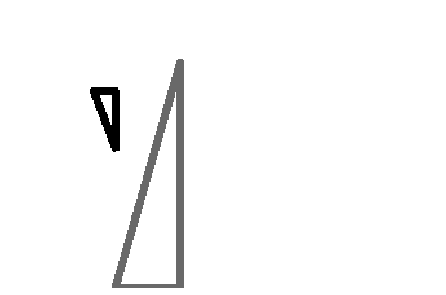

starting point: (0, 0)
goal point: (10, 0)
solution Path: [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0), (10, 0)]
cost of the solution: 11
number of expanded nodes: 441
actual running time of the program: 0.023514986038208008


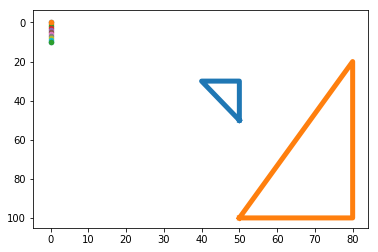

In [35]:
#Test Case No. 1: 
startNode, goalNode, grid, shapes = createStateSpaceGrid('in1.txt','maze1.png')
graph = createGraph(grid)  #create the graph dictionary
bfsSolPath = bfsAlgo(graph, startNode, goalNode)
finalPlot(bfsSolPath, startNode, goalNode, shapes, 'bfsTestOne.png')


**Result Description:**

With 11 nodes included in the solution, as seen above, the solution generated is just a vertical line even though expanding 441 nodes in ~0.0021 seconds. 

In [ ]:
#Test Case No. 2:
startNode, goalNode, grid, shapes = createStateSpaceGrid('in2.txt','maze2.png')
graph = createGraph(grid)  #create the graph dictionary
bfsSolPath = bfsAlgo(graph, startNode, goalNode)
finalPlot(bfsSolPath, startNode, goalNode, shapes, 'bfsTestTwo.png')

**Result Description:**

With 66 nodes out of the 60607 expanded nodes, the behavior of the solution path looks like it's moving vertical until it reached the same y-coordinate as the goal point and it moved horizontal to the right until it reached the same x-coordinate of the goal goal point. The time is about 3.311 seconds.

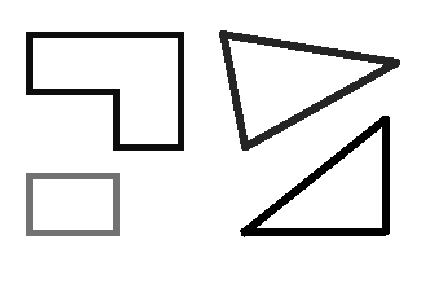

starting point: (0, 0)
goal point: (9, 140)
solution Path: [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6), (7, 7), (7, 8), (7, 9), (7, 10), (7, 11), (7, 12), (7, 13), (7, 14), (7, 15), (7, 16), (7, 17), (7, 18), (7, 19), (7, 20), (7, 21), (7, 22), (7, 23), (7, 24), (7, 25), (7, 26), (7, 27), (7, 28), (7, 29), (7, 30), (7, 31), (7, 32), (7, 33), (7, 34), (7, 35), (7, 36), (7, 37), (7, 38), (7, 39), (7, 40), (7, 41), (7, 42), (7, 43), (7, 44), (7, 45), (7, 46), (7, 47), (7, 48), (7, 49), (7, 50), (7, 51), (7, 52), (7, 53), (7, 54), (7, 55), (7, 56), (7, 57), (7, 58), (7, 59), (7, 60), (7, 61), (7, 62), (7, 63), (7, 64), (7, 65), (7, 66), (7, 67), (7, 68), (7, 69), (7, 70), (7, 71), (7, 72), (7, 73), (7, 74), (7, 75), (7, 76), (7, 77), (7, 78), (7, 79), (7, 80), (7, 81), (7, 82), (7, 83), (7, 84), (7, 85), (7, 86), (7, 87), (7, 88), (7, 89), (7, 90), (7, 91), (7, 92), (7, 93), (7, 94), (7, 95), (7, 96), (7, 97), (7, 98), (7,

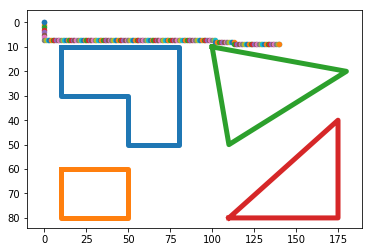

In [36]:
#Test Case No. 3:
startNode, goalNode, grid, shapes  = createStateSpaceGrid('in3.txt','maze3.png')
graph = createGraph(grid)  #create the graph dictionary
bfsSolPath = bfsAlgo(graph, startNode, goalNode)
finalPlot(bfsSolPath, startNode, goalNode, shapes, 'bfsTestThree.png')

**Result Description:**

With 153 nodes in the solution path out of the 635672 expanded nodes, the behavior looked like before; however, this time the goal point has the same y-coordinate with that of the obstacle, as we can see it moved down and then right since it met an obstaccle then it changes it y's corrdinate seeing there is no obstacle in the path and while also incrementing its x-coordinates until it reached the goal point. This is the longest time so far having ~265.69 seconds.


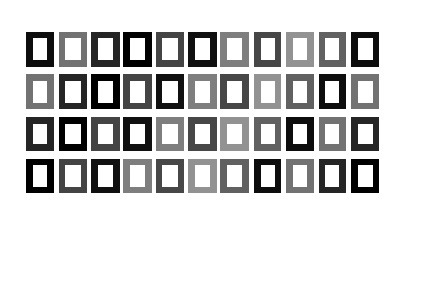

starting point: (0, 0)
goal point: (52, 97)


KeyboardInterrupt: 

In [32]:
#Test Case No. 4:
startNode, goalNode, grid, shapes  = createStateSpaceGrid('in4.txt','maze4.png')
graph = createGraph(grid)  #create the graph dictionary
bfsSolPath = bfsAlgo(graph, startNode, goalNode)
finalPlot(bfsSolPath, startNode, goalNode, shapes, 'bfsTestFour.png')

**Result Description:**

With 150 nodes in the solution path out of the 550560 nodes, the behavior is much like the second one despite the environment that has multiple small obstacles. It changes its y-coordinate until meeting the y-coordinate of the goal point and moves to the right until meeting the x-coordinate of the goal point since there's no obstacle as we can see. It used up ~127.5943 seconds

In [ ]:
#Test Case No. 5:
startNode, goalNode, grid, shapes  = createStateSpaceGrid('in5.txt','maze5.png')
graph = createGraph(grid)  #create the graph dictionary
bfsSolPath = bfsAlgo(graph, startNode, goalNode)
finalPlot(bfsSolPath, startNode, goalNode, shapes, 'bfsTestFive.png')

   #### B. Depth-First Search(DFS) Implementation  

**Problem Definition:**

Given the starting and goal point, we are tasked to know the shortest solution path between those two points using the Depth-First Search Algorithm. 


**Data Structures**

We use two data structures:
   
   (1) *path* is a dictionary to know the parent of the given node.
   
   (2) *visited* is a queue.

   (3) *fringe* is a priority queue. 


**We proceed to the process:**

1.we put the starting node in the fringe with priority 0

2.we explore while the fringe still has nodes
   
3.so we pop the first element of the fringe which has the highest priority
   
4.put this to the expanded node
  
5.We check if the node that is expanded is the goal. We stop if it is and if not, we continue

6.Since it's not the goal node, we look to its children
that is if the node is not in the fringe, we append it
to the fringe. 

7.Since in working with dfs, the fringe does the trick, we assign the priority depending on the depth of the node. We put the negative sign so that we consider them first as this is dfs. 
This also let us not use anymore the parent dictionary. 


We implement this solution in the code below:

In [15]:
from queue import PriorityQueue
from collections import defaultdict 
import time

def dfs(expandedNode, graph, startNode, goalNode):
    path = [startNode]
    visited = []
    fringe = PriorityQueue()
    fringe.put((0, startNode, path, visited))

    while fringe:
        depth, currentNode, path, visited = fringe.get()
        
        expandedNode.append(currentNode)

        if currentNode == goalNode: 
            return (path + [currentNode]),expandedNode
          
        if currentNode not in visited:
          visited = visited + [currentNode]

        for node in graph[currentNode]: #look at the children
            if node not in visited:
                if node == goalNode:
                    expandedNode.append(node)
                    return (path + [node]),expandedNode               
                fringe.put((-len(path), node, path + [node], visited + [node]))
    return path 

def dfsAlgo(graph, startNode, goalNode):
    expandedNode = []
    print("starting point:", startNode)
    print("goal point:", goalNode)
    start = time.time()
    path, expandedNode= dfs(expandedNode, graph, startNode, goalNode)
    end = time.time()
    print("solution path:", path) 
    print("cost of the solution:", len(path))
    print("number of expanded nodes:",len(expandedNode))
    print("actual running time of the program:", end - start)
    
    return path

**Visualize Results**

We use the function *finalPlot* below to plot our state space together with the solution path. The format of the function call is:

      finalPlot(<name>SolPath, startNode, goalNode, shapes, '<name>Test<Number>.png')

where *name* can be 'bfs','dfs' or 'A*' and *Number* is just to specify which test case.

The *finalPlot* takes in the solution path of the search algorithm, the starting point, goal point, shapes and the image name. The shapes are used to draw the polygon obstacles just as like before. The solution path, starting point and goal point are the ones added to the state space. Lasly, the image name is used to save the final plot. 


*Note:*
This is the same as before but copied here for easier read for the reader.
The *finalPlot* function used here can be found above in BFS.

#### Five Test Cases ran on DFS

Each test case is designed to show the weaknesses and strengths of the search algorithms for later usage in Analysis. 
The following test cases are performed with DFS:

In [ ]:
#Test Case No. 1:
startNode, goalNode, grid, shapes = createStateSpaceGrid('in1.txt','maze1.png')
graph = createGraph(grid)  #create the graph dictionary
dfsSolPath = dfsAlgo(graph, startNode, goalNode)
finalPlot(dfsSolPath, startNode, goalNode, shapes, 'dfsTestOne.png')


**Result Description:**

With the same number of expanded nodes with the solution path, the behavior of dfs as we can see is like brute forcing the rows and checking if the goal is found.

In [ ]:
#Test Case No. 2:
startNode, goalNode, grid, shapes = createStateSpaceGrid('in2.txt','maze2.png')
graph = createGraph(grid)  #create the graph dictionary
dfsSolPath = dfsAlgo(graph, startNode, goalNode)
finalPlot(dfsSolPath, startNode, goalNode, shapes, 'dfsTestTwo.png')

**Result Description:**

Same as with the behavior as above but this time given large obstacles, the cost of solution is less than the expanded nodes that is 2984 vs 2992 traversed in ~1.3572 seconds.

In [ ]:
#Test Case No. 3:
startNode, goalNode, grid, shapes = createStateSpaceGrid('in3.txt','maze3.png')
graph = createGraph(grid)  #create the graph dictionary
dfsSolPath = dfsAlgo(graph, startNode, goalNode)
finalPlot(dfsSolPath, startNode, goalNode, shapes, 'dfsTestThree.png')

**Result Description:**
Taking up ~2.90 seconds to get the solution path consisting of 4333 nodes out of 4359 nodes, the behavior as we can see is much like the same as before but at this time it round tripped to the farthest right then it moved all the way up going to the right then going to the left until it reaches its destination. 

In [ ]:
#Test Case No. 4:
startNode, goalNode, grid, shapes = createStateSpaceGrid('in4.txt','maze4.png')
graph = createGraph(grid)  #create the graph dictionary
dfsSolPath = dfsAlgo(graph, startNode, goalNode)
finalPlot(dfsSolPath, startNode, goalNode, shapes, 'dfsTestFour.png')

**Result Description:**

As consistent as above's behaviors, with multiple small obstacles its solution path is lessen with 12 nodes as compare to its expanded nodes covering almost 3/4 of the plot in about ~2.3944 seconds.

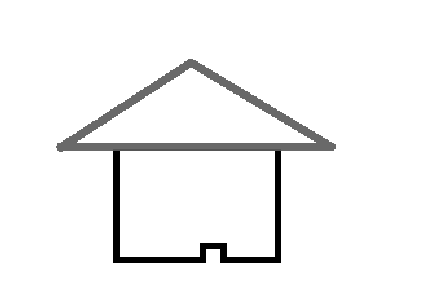

starting point: (89, 0)
goal point: (89, 94)


KeyboardInterrupt: 

In [28]:
#Test Case No.5:
startNode, goalNode, grid, shapes = createStateSpaceGrid('in5.txt','maze5.png')
graph = createGraph(grid)  #create the graph dictionary
dfsSolPath = dfsAlgo(graph, startNode, goalNode)
finalPlot(dfsSolPath, startNode, goalNode, shapes, 'dfsTestFive.png')

**Result Description:**

This is the slowest dfs solution for this kind of environment. With 9198 seconds out of 9929 seconds, it amounted to ~16.4652 seconds. The behavior is as follows: upon hitting an obstacle, it moved upward until it reached the limit above, then it moved downward just as before brute forcing rows until it reached the destination.

#### C. A* Search Implementation  

**Problem Definition:**

Given the starting and goal point, we are tasked to know the shortest solution path between those two points using the A* Search Algorithm. 


**Heuristic Function**

We tried using three heuristic functions, the Manhattan distance heuristic, the Diagonal distance heuristic, and the Chebychev distance heuristic. 

From these and our explorations with these, we decided to simply use the Diagonal distance heuristic, as it is the most easily visible estimate of the distance between two points in a 2D space, as this is the actual distance between the points, when permitting diagonal movement from point to point.

The Manhattan distance heuristic on the other hand is appropriate when disallowing diagonal movement from point to point.

**Data Structures**
We use three data structures:
   
   (1) an atomic *cell* structure which represents points in our maze. A cell notes relational (parent) and positional information of a node, along with the capacity to store cost, heuristic, and total cost (all initialized to 0, but to be incrementally reinitiallized for each run of our algorithm)
   
   (2) a *priority queue* like list, from which we pop the node of least cost with each iteration of the algorithm

   (3) a *tree* of cells, formed by the relational information of cells
   
**We proceed to the process:**

1.initialize open and closed lists

2. insert start node into open list (with total_cost = 0)
   
3. while there is a node in the open list (ie. list is not empty)

    (a) pop the least total_cost node from the open list
    
    (b) check if goal node is the node that has just been added to the open list; if not
    
    (c) generate the adjacent cells or neighbors of the current node in the open list, parent as the current node
    
    (d) iterate through each adjacent cell to check
    
        (i) if the adjacent node is the end point or goal point,stop searching and RETURN the PATH from the start node to this node
        
        (ii) if the adjacent node is NOT walkable or has an obstacle shape, then SKIP
        
        (iii) if the adjacent node is beyond the range of the width and height of the maze, SKIP
        
        (iv) for each valid adjacent cell, make a CHILD node, with the CURRENT node as its parent
        
4. for each valid child or adjacent cell
    
    (a) check if the child has already been processed, or is already in the closed list. If is already in the closed list, SKIP
    
    (b) check the heuristic of the child node (for our default, the heuristic is set to the diagonal distance between nodes)
    
    (c) determine the total estimated cost of reaching the new node
    
    (d) check of the child node is in the open list. If it is in the list, check if the cost of the current child from its current parent node is more than its cost stored in the open list; if so, SKIP.
  
The algorithm will end when the current node reached is end or goal node.

We implement this solution in the code below:

In [16]:
# based on tutorial from
# https://medium.com/@nicholas.w.swift/easy-a-star-pathfinding-7e6689c7f7b2
# and 
# https://www.geeksforgeeks.org/a-search-algorithm/
import math

class Node():
    """A node class for A* Pathfinding"""

    def __init__(self, parent=None, position=None):
        self.parent = parent
        self.position = position

        self.cost = 0
        self.heuristic = 0
        self.total_cost = 0

    def __eq__(self, other):
        # print("checking node equality", self.position, other.position)
        return self.position[0] == other.position[0] and self.position[1] == other.position[1] 

def get_distance(x1, y1, x2, y2, technique):
    if technique == "diagonal":
        return (x1 - x2)**2 + (y1 - y2)**2 # ((child.position[0] - end_node.position[0]) ** 2) + ((child.position[1] - end_node.position[1]) ** 2)
    
    if technique == "manhattan":
        return abs(x1 - x2) + abs(y1 - y2)


def astar(maze, start, end):
    # create start and end node
    start_node = Node(None, start)
    end_node = Node(None, end)

    expandedNodes = 0

    # initialize lists
    open_list   = []
    closed_list = []

    # put the start node in the open list
    open_list.append(start_node)

    # define looping condition
    # ie. if there are nodes left to open
    # then continue to loop
    has_open_node = len(open_list) > 0

    while has_open_node:
        curr_index = 0
        curr_node = open_list[curr_index]

        # find the node with the least total_cost
        for index, node in enumerate(open_list):
            if node.total_cost < curr_node.total_cost:
                curr_node  = node
                curr_index = index

        # pop most recent current node from open list
        # enqueue to closed_list
        open_list.pop(curr_index)


        closed_list.append(curr_node)

        # Found the goal
        if curr_node == end_node:
            path = []
            curr = curr_node
            while curr is not None:
                path.append(curr.position)
                curr = curr.parent
            path.reverse()
            return path, expandedNodes

        # initialize children list
        children = []

        # set the relative positions of all possible adjacent cells
        # technique is given by Swift, Nicolas
        # from https://medium.com/@nicholas.w.swift/easy-a-star-pathfinding-7e6689c7f7b2

        adj_cells = [(-1, -1), (-1, 0), (-1, 1),
                     ( 0, -1),          (0, 1),  
                     (1, -1),  ( 1, 0), (1, 1)]
        
        for new_position in adj_cells: # adj squares
            # Get node position
            curr_x = curr_node.position[0]
            curr_y = curr_node.position[1]

            new_x = new_position[0]
            new_y = new_position[1]

            node_position = (curr_x + new_x, curr_y + new_y)

            # Make sure walkable terrain
            is_walkable = maze[node_position[0]][node_position[1]] == 0
            if not is_walkable:
                continue

            # Make sure within range
            is_within_range = node_position[0] > (len(maze) - 1) or node_position[0] < 0 or node_position[1] > (len(maze[len(maze)-1]) -1) or node_position[1] < 0
            if is_within_range:
                continue

            # Create new node
            new_node = Node(curr_node, node_position)

            # Append
            children.append(new_node)

        # Check children
        for child in children:
            for closed_child in closed_list: # for all nodes that have been checked
                if child == closed_child:    # check if this node has been checked
                    continue                 # if checked, don't process

            # total_cost, cost, and heuristic values
            child.cost = curr_node.cost + 1

            child.heuristic = get_distance(child.position[0], child.position[1], end_node.position[0], end_node.position[1], "diagonal")
            
            # heuristic could either be chebychev or diagonal

            child.total_cost = child.cost + child.heuristic

            for open_node in open_list:     # if child is in set of points pending opening
                child_is_open = child == open_node
                if child_is_open:
                    if child.cost > open_node.cost:
                        continue

            # Add the child to the open list
            expandedNodes = expandedNodes + 1
            open_list.append(child)

**Test case runs**

Test cases for A* are implemented by toggling the variable 'TEST_CASE' any value from 1 to 5. This will then pull input files of their corresponding numbers.

In [21]:
from read import *
from astar import Node, astar

def run_test_case(TEST_CASE):
    startNode, goalNode, shapes = read_input('in'+ str(TEST_CASE) + '.txt')
    print(shapes)

    plt.figure()
    plt.xlim(0, 200)
    plt.ylim(0, 100)

    plt.gca().invert_yaxis()

    for shape in shapes:
        plot_polygon(shape)

    # plt.show()

    plt.plot(100, 200) # to ensure dimensions are 100,200
    plt.axis('off')
    plt.tick_params(axis='both', left=False, top=False, right=False, bottom=False, labelleft=False, labeltop=False,
                        labelright=False, labelbottom=False)
    
    plt.savefig('maze'+ str(TEST_CASE) + '.png', bbox_inches='tight', transparent=True, pad_inches=0)

    # plt.show()
    plt.clf() 


    img = cv2.imread('maze'+ str(TEST_CASE) + '.png', cv2.IMREAD_GRAYSCALE)
    light = cv2.resize(img, (200, 100))

    # plt.axis('off')
    plt.tick_params(axis='both', left=False, top=False, right=False, bottom=False, labelleft=False, labeltop=False, labelright=False, labelbottom=False)
    plt.tight_layout(pad=0)
    imgplot = plt.imshow(img, cmap='Greys_r')

    grid = np.zeros((100, 200))
    grid = grid.tolist()

    for row, row_points in enumerate(light):
        for col, col_val in enumerate(row_points):
            if col_val < 255:
                # print("found a color")
                grid[row][col] = int(1)
            else:
                grid[row][col] = int(0)

    start = time.time()
    path, expandedNodes = astar(grid, startNode, goalNode)
    end = time.time()

    plt.clf()

    img = cv2.imread('maze'+ str(TEST_CASE) + '.png', cv2.IMREAD_GRAYSCALE)
    light = cv2.resize(img, (200, 100))

    plt.xlim(0, 200)
    plt.ylim(0, 100)


    plt.gca().invert_yaxis()

    for shape in shapes:
        plot_polygon(shape)


    for point in path:
        plot_point(point)

    # plt.axis('off')
    # cplt.tick_params(axis='both', left=False, top=False, right=False, bottom=False, labelleft=False, labeltop=False, labelright=False, labelbottom=False)
    plt.tight_layout(pad=0)
    plt.savefig('maze'+ str(TEST_CASE) + '_sol.png')
    plt.show()


    print("starting point:", startNode)
    print("goal point:", goalNode)
    print("solution Path:",path)
    print("cost of the solution:", len(path))
    print("number of expanded nodes:",expandedNodes)
    end = time.time()
    print("actual running time of the program:", end - start)


**Visualize Results**

Results are visualized per test case with their

#### Five Test Cases ran on A*

Each test case is designed to show the weaknesses and strengths of the search algorithms for later usage in Analysis. 
The following test cases are performed with A*:

[[[50, 50], [30, 50], [30, 40]], [[100, 50], [20, 80], [100, 80]]]


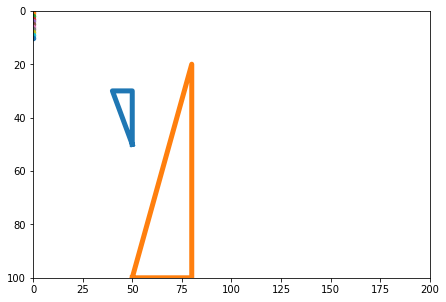

starting point: (0, 0)
goal point: (10, 0)
solution Path: [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0), (10, 0)]
cost of the solution: 11
number of expanded nodes: 48
actual running time of the program: 0.3849971294403076


In [22]:
#Test Case No. 1:
from astar import Node, astar

run_test_case(1)

**Result Description for A* Test Case 1:**

From the above we can see that the results are similar to DFS, but requiring significantly less node expansion. The cost of the solution path is the same, but node expansion is a magnitude of 10 less. This shows how A* more deliberately decides its searach direction, vs. DFS and BFS, which are generally less deliberate.

In [ ]:
#Test Case No. 2:
from astar import Node, astar

run_test_case(2)

**Result Description for A* Test Case 2:**

The above is again significantly faster than the same test case for BFS and DFS.  The expanded nodes are almost an order of 10 smaller, while the actual runtime of the algorithm is almost half that of the other algorithms for the same test case environment.

In [ ]:
#Test Case No. 3:
from astar import Node, astar

run_test_case(3)

**Result Description for A* Test Case 3:**

For this test case we can better see how A* is deliberate in its searching. Instead of searching through spaces which are not close to the goal point, it goes directly to the direction of the goal poin. It intelligently detects the obstacle shape and avoids such, but immediately returns to the direction of the goal state.

In [ ]:
#Test Case No. 4:
from astar import Node, astar

run_test_case(4)

**Result Description for A* Test Case 4:**

Though its solution path is once again somewhat comparable to that of DFS, this test case once again shows the deliberate nature of the direction of A* search. It immediately and consistently moves in the direction of its intended goal, with significantly fewer node expansions.

In [ ]:
#Test Case No. 5:
from astar import Node, astar

run_test_case(5)

**Result Description for A* Test Case 5:**

This test case highlights the deliberate and precise nature of A*, which enabled it to consistently move in the direction of its goal state, with the least amount of detours, despite the precision of the obstacles in its way.

## Analysis:

We proceed now to the Analysis part such that we make use of the generated information of the test cases to analyze and compare each search algorithm.


### Test Case #1: Seeing Raw Behavior
<img src="Analysis1.png">

The objective of the first test case is to see the raw behavior of algorithms such that there are no obstacles on its path. Shockingly, the first one to arrived to the goal given the actual running time is the BFS implementation with only ~0.00214 seconds. However compared to to A*’s ~0.00249 seconds, we can see the difference between node expansion and cost of solution. The BFS having 11 nodes in the solution vs the 10 nodes of the A* in the solution which is not that much of a difference; however, the big difference is seen in terms of their expanded nodes with the BFS having 441 nodes compared to the 11 node expansion of A*. The one which ranked last given it’s behavior of almost brute forcing each row is the DFS amounting the actual running time of ~0.4880 seconds, having both the cost of the solution and expanded nodes to be 2001.

From here we can see the blind nature of the first two searches, which both simply iterate through the entire search space, albeit in different directions. In this case, the goal state was in the favor of BFS, but this is simply because of how BFS is implemented as it goes to the breadth first. In contrast, A* can be seen to go directly in the direction of its goal state, but its deliberate nature cannot be fully appreciated in this simple case.

For a better appreciation of A*’s deliberate nature, we may move on to the next test case.

### Test Case #2: Big Obstacles with the Goal Near the Left
<img src="Analysis2.png">
This maze highlights a case where BFS’ blind search would be in favor of its efficiency. The level order nature in which BFS traverses nodes of its search tree allows the algorithm to quickly seek a goal point which is found to the relative lower left of its starting point. This is at the cost though of a massive traversal of the search space, which is over 4 magnitudes (10^4) greater than that of DFS, and 5 magnitudes (10^5) greater than that of A*.

In contrast, this would not be beneficial to DFS’ nature of preorder traversal, which would require it to traverse and extend the depth of its search space to reach a goal state in the same relative position. This can be seen in how the depth of the search is blindly extended throughout almost a third of the search space before DFS is able to reach its goal state.

Search order traversal is not a hindrance on the other hand to A* search, which is immediately able to align its search in the relative direction of its goal state. Once it hits an obstacle shape, it appropriately adjusts its direction to avoid such obstacle, but as soon as such is out of the search direction space, the direction of the search is promptly directed once again to that of its goal state. 

### Test Case #3: Big Obstacles with the Goal Near the Right
<img src="Analysis3.png">
The solution path for BFS is once again relatively short, compared to DFS, but at the expense of a massive search of the search space, which is almost 2 magnitudes (100) greater than that of DFS. In contrast, DFS’s traversal is more quickly determine the location of the given goal state, but the solution path from such search is evidently more costly (over 10 times more costly) than that of BFS.

A* once again trumps both other blind algorithms, with significantly fewer node expansions, and a in only slightly more time than DFS. While DFS extends its depth exponentially to avoid obstacle shapes, A* simply adjusts its path minutely to avoid such, allowing the least admissible amount of deviation from the direction of its goal state.

### Test Case #4:  Multiple Small Obstacles 
<img src="Analysis4.png">
Done with testing with large multiple obstacles, we see what if there are small multiple obstacles, especially with different choices of paths to go to the goal point set below in the middle. 

As seen, even though the DFS harnessed the most cost in the solution and most number of expanded nodes, it triumphed to be the fastest to reach the goal. The second one that reached the goal is A* with only 128 cost in its solution vs its 757 expanded nodes. Lastly, given BFS’ behavior of doing breadth first and the environment set-up, it is much expected that it would come last as it harnessed ~127.59 seconds before reaching the goal. 

### Test Case #5:  Precision goal with obstacle
<img src="Analysis5.png">

In this last set-up, the objective is having large obstacles but the goal is in a narrow part. 
This time despite BFS’ and A*’s competition to be the fastest, A* won this time. It looked like the same as BFS given the figures; however, seeing them more clearly, even though A* won, it harnessed more nodes in its solution path and expanded nodes than BFS. As always, DFS’ brute forcing behavior led it to ~16 seconds, also having the largest cost in its solution and number of expanded nodes.



##### References:

Apollo, ApolloApollo 163115, Mathias EttingerMathias Ettinger 25.1k33185, & Sesoteksesotek 5111. (n.d.). BFS Implementation in Python 3. Retrieved from https://codereview.stackexchange.com/questions/135156/bfs-implementation-in-python-3

Bader, D. (2017). Priority Queues in Python – dbader.org. Retrieved from https://dbader.org/blog/priority-queues-in-python

Laurent Luce's Blog. (n.d.). Retrieved from https://www.laurentluce.com/posts/solving-mazes-using-python-simple-recursivity-and-a-search/?fbclid=IwAR2RBw9xDekTR8ewSLGbYdstkUesPaF5BR3XwA-nXPpiVR68gNqckMj7WY4

Lennyboyatzis. (2017). AI - Teaching Pacman To Search With Depth First Search. Retrieved from https://medium.com/@lennyboyatzis/ai-teaching-pacman-to-search-with-depth-first-search-ee57daf889ab

Swift, N. (2017). Easy A* (star) Pathfinding. Retrieved from 
https://medium.com/@nicholas.w.swift/easy-a-star-pathfinding-7e6689c7f7b2?fbclid=IwAR1XKoVqoJrR25lTZXWJ05sbNMasFvLNP6r5NiXe9UjjecvuGDU6GsUYg5Q